
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/medical-charges.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Потрібно розглянути залежність таргета charges від незалежних колонок 
Для цього можна побудувати матрицю кореляцій і після цього наалізувати залежності
Також можна нормадлізувати колонку smoker, перетворивши її на 0 і 1 значення
Відомо (з лекції), що таргет залежить від того, палить людина чи ні? а також від віку
Я вважаю, що доцільно розгялнути залежність від регіону (наприклад в різних регіонах може бути різною вартість медичних послуг і відповідно різною вартість страхівки)
Залежність від статі теж варто розглянути
Bmi теж може впливати на страхтівку, адже люди з надлишковою вагою можуть мати більше захворювань серцево-судинної системи, хоча це може сприйматисьяк дискримінація    

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [19]:

fig = px.histogram(df,
                   x='region',
                   y='charges',
                   marginal='box',
                   color='sex',
                   title='Distribution of regions')
fig.update_layout(bargap=0.1)
fig.show()

В регіоні southeast помітно більше чоловіків

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [21]:
fig = px.histogram(df,
                   x='region',
                   marginal='box',
                   color='smoker',
                   title='Distribution of smoker and region')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig = px.histogram(df,
                   x='region',
                   y='charges',
                   marginal='box',
                   color='smoker',
                   title='Distribution of smoker and region')
fig.update_layout(bargap=0.1)
fig.show()

Бачимо на графіках, що співвідношення курців-некурців у всіх регіонах приблизно однакове (в регіоні southeast більше даних), але саме курці в southeast вносять найбільшу суму в тотал charges по регіону

In [23]:
fig = px.histogram(df,
                   x='children',
                   marginal='box',
                   color='smoker',
                   title='Distribution of smoker and children')
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
fig = px.histogram(df,
                   x='children',
                   y='charges',
                   marginal='box',
                   color='smoker',
                   title='Distribution of smoker and children')
fig.update_layout(bargap=0.1)
fig.show()

Серед людей з 4 і 5 дітьми дуже мало курців

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [26]:
px.violin(df, x='children', y='charges')

In [68]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

З кількістю дітей до 4х медіана таргета збільшується, для 5 дітей вона трохи опускається вниз, але це може бути зумовлено невеликою кількістю користувачів з 5 дітьми

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [27]:
non_smoker_df = df[df.smoker == 'no']

In [28]:
def estimate_charges(age, w, b):
    return w * age + b

In [29]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

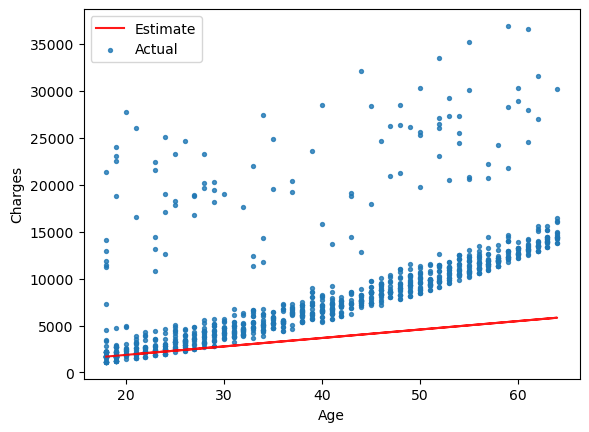

In [69]:
try_parameters(non_smoker_df, 90, 70)

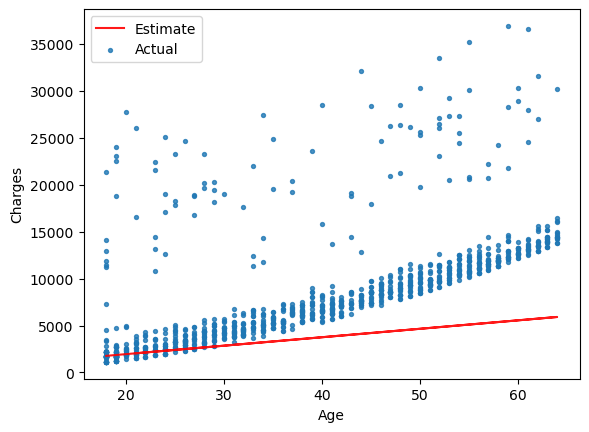

In [71]:
try_parameters(non_smoker_df, 90, 150)

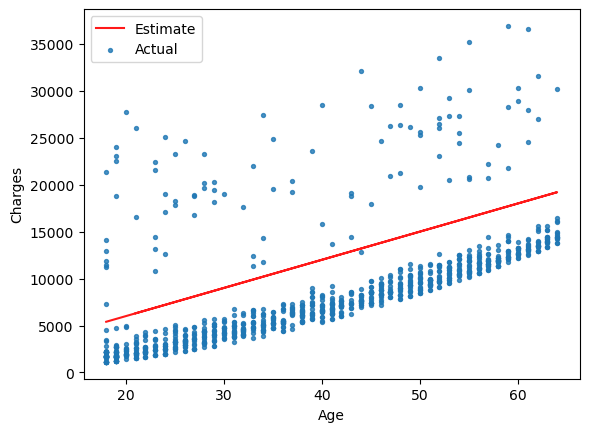

In [70]:
try_parameters(non_smoker_df, 300, 0)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [63]:
def analizeRSME(df, w, b):
    estimated_charges = estimate_charges(df['age'], w, b)
    targets = df['charges']
    rmse = np.sqrt(np.mean(np.square(estimated_charges-targets)))
    print("RSME for {} and {} is {}".format(w, b, rmse)) 

In [72]:
analizeRSME(non_smoker_df, 90, 70)

RSME for 90 and 70 is 7154.92068349473


In [73]:
analizeRSME(non_smoker_df, 90, 150)

RSME for 90 and 150 is 7101.278471629186


In [74]:
analizeRSME(non_smoker_df, 300, 0)

RSME for 300 and 0 is 5777.9687699351425


Загальна стратегія - виставити кут і регулювати параметр b, але цікаво те, що при великих значенних w значення b вже мало впливає на RSME